In [14]:
from secrets_ian import capstone_db
import pandas as pd
import psycopg2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
engine = capstone_db["engine"]
db_name = capstone_db["db_name"]
user = capstone_db["username"]
pw = capstone_db["password"]
host = capstone_db["db_url"]

conn = psycopg2.connect(dbname=db_name, user=user, password=pw, host=host)

In [3]:
cols = [
    "county_fips",
    "period_end",
    "property_type",
    "property_type_id",
    "median_sale_price_yoy",
    "median_list_price_yoy",
    "median_ppsf_yoy",
    "median_list_ppsf_yoy",
    "homes_sold_yoy",
    "pending_sales_yoy",
    "new_listings_yoy",
    "inventory_yoy",
    "months_of_supply_yoy",
    "median_dom_yoy",
    "avg_sale_to_list_yoy",
    "sold_above_list_yoy",
    "price_drops_yoy",
    "off_market_in_two_weeks_yoy",
]

rf_sql = """
select 
*
from redfin_county_full
"""

redfin = pd.read_sql(rf_sql, con=conn)


In [29]:
#redfin.info()
#redfin.head()

In [8]:
X = redfin[cols]

In [11]:
cor_matrix = X.corr().abs()
#print(cor_matrix)

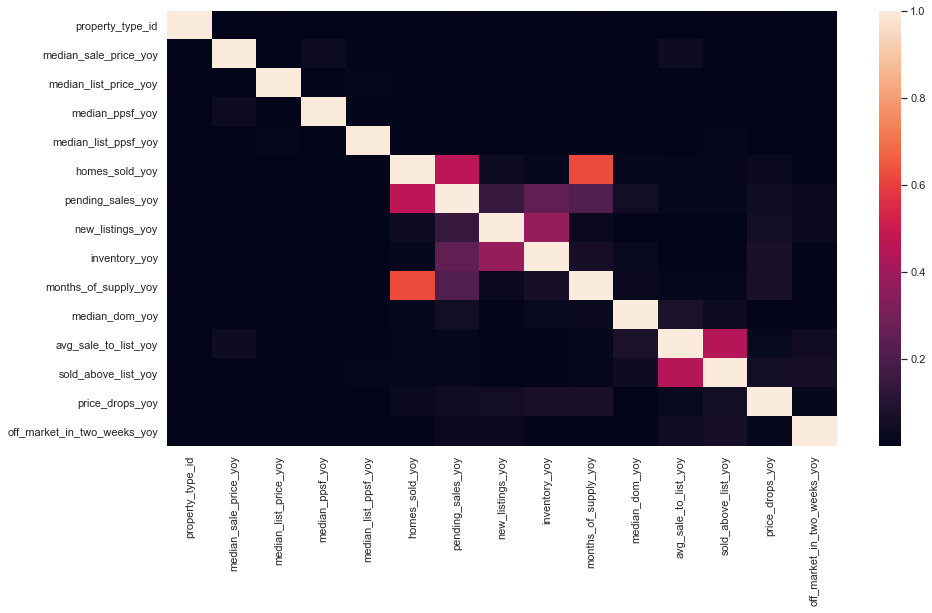

In [15]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(cor_matrix)

In [19]:
import plotly.express as px
fig = px.imshow(cor_matrix, aspect="auto")
fig

In [20]:
redfin["property_type"].unique()

array(['All Residential', 'Multi-Family (2-4 Unit)', 'Condo/Co-op',
       'Single Family Residential', 'Townhouse'], dtype=object)

In [25]:
single_homes = X[X["property_type"] == "All Residential"]

In [26]:
home_corr_mat = single_homes.corr().abs()

In [27]:
import plotly.express as px
fig = px.imshow(home_corr_mat, aspect="auto")
fig